In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

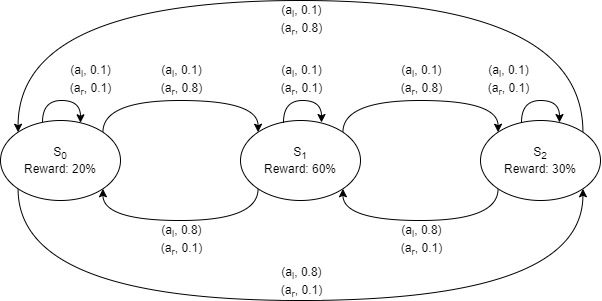

In [2]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [3]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + (-1 if a == 0 else 1)) % STATE_COUNT # Left and right movement
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.1, 0.1, 0.8],
       [0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1]])

In [4]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [5]:
REWARD_PROBS = [0.2, 0.6, 0.3]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p] = REWARD_PROBS[s_p]
        
reward_table

array([[[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]],

       [[0.2, 0.6, 0.3],
        [0.2, 0.6, 0.3]]])

In [6]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = POMDP_Model(states, actions, observations, transition_table, reward_table, observation_table)

## Solving

In [8]:
solver = PBVI_Solver(model)

In [9]:
value_function, solve_history = solver.solve(8,4)

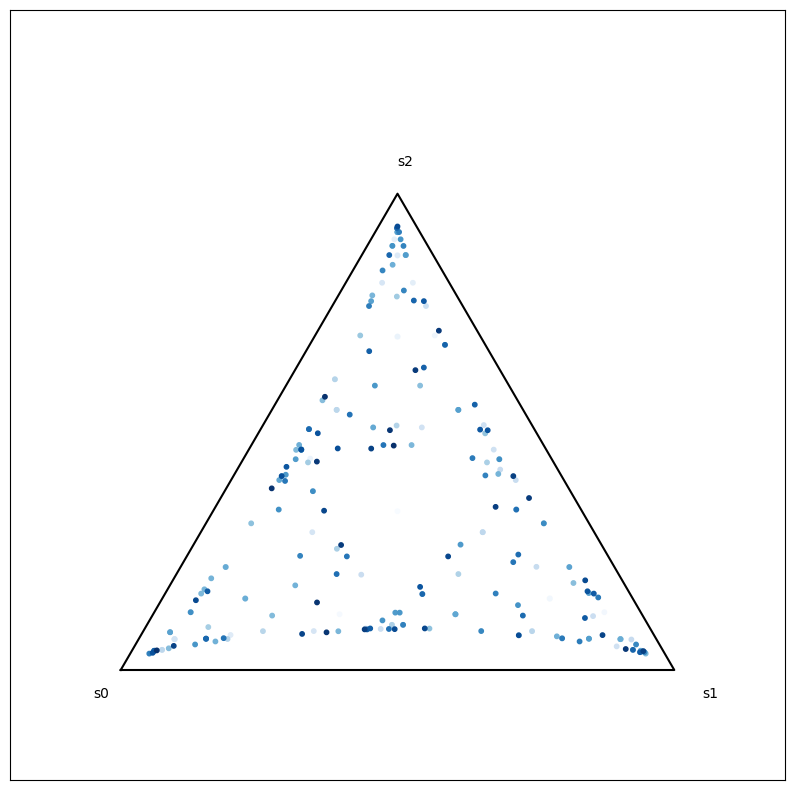

In [10]:
solve_history.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([3.86387515, 3.81547666, 4.01697996]),
 AlphaVector([4.0224904 , 3.85567935, 3.81159747]),
 AlphaVector([3.98513201, 3.88167869, 3.80062677]),
 AlphaVector([4.01790513, 3.8636981 , 3.81287933]),
 AlphaVector([3.85567935, 3.81159747, 4.0224904 ]),
 AlphaVector([3.86136265, 3.81608303, 4.0171521 ]),
 AlphaVector([3.85563931, 3.81125963, 4.02254069]),
 AlphaVector([3.98374403, 3.88200507, 3.79990212]),
 AlphaVector([4.02189956, 3.85568968, 3.81381098]),
 AlphaVector([3.85569452, 3.81377911, 4.02191439]),
 AlphaVector([4.01696027, 3.86410279, 3.81518109]),
 AlphaVector([3.98513249, 3.88167876, 3.80062529]),
 AlphaVector([3.8534867 , 3.81440045, 4.02188067]),
 AlphaVector([3.86400049, 3.81507007, 4.0171108 ]),
 AlphaVector([3.85568968, 3.81381098, 4.02189956]),
 AlphaVector([4.02254069, 3.85563931, 3.81125963]),
 AlphaVector([4.02191439, 3.85569452, 3.81377911]),
 AlphaVector([3.97241663, 3.89346992, 3.72232074]),
 AlphaVector([4.02253527, 3.85583904, 3.81099968]),
 AlphaVector

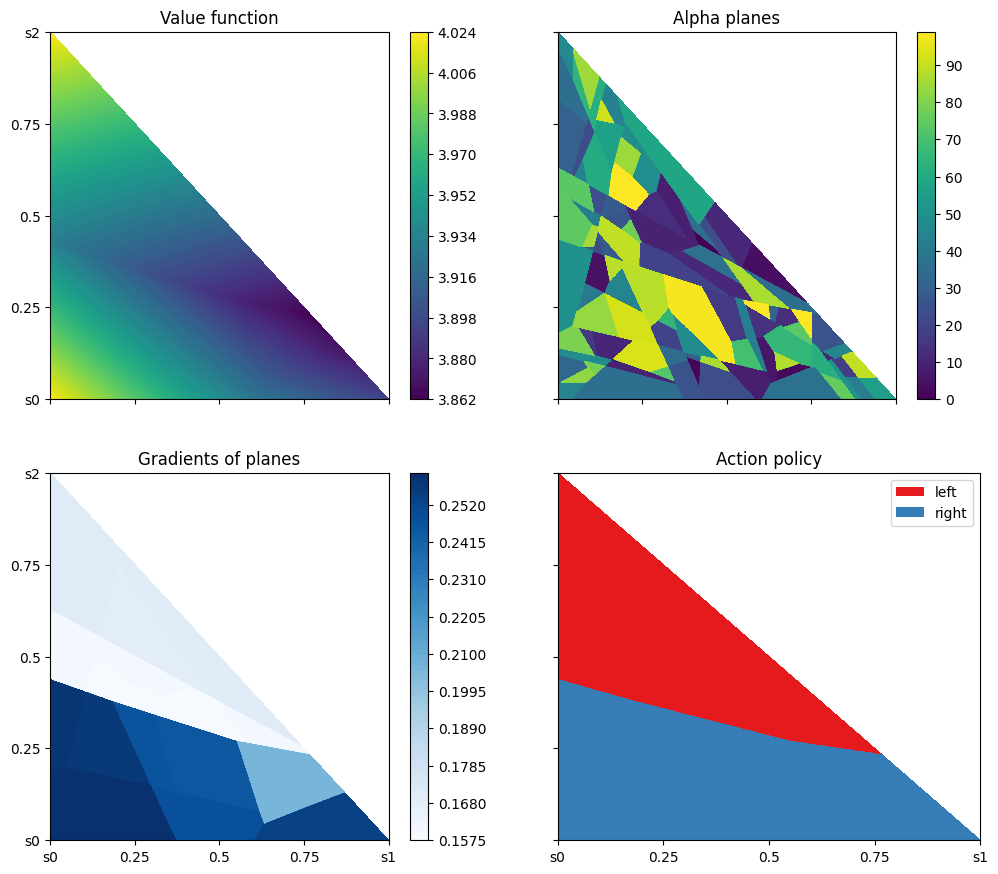

In [12]:
solve_history.plot_solution(3, plot_belief=False)

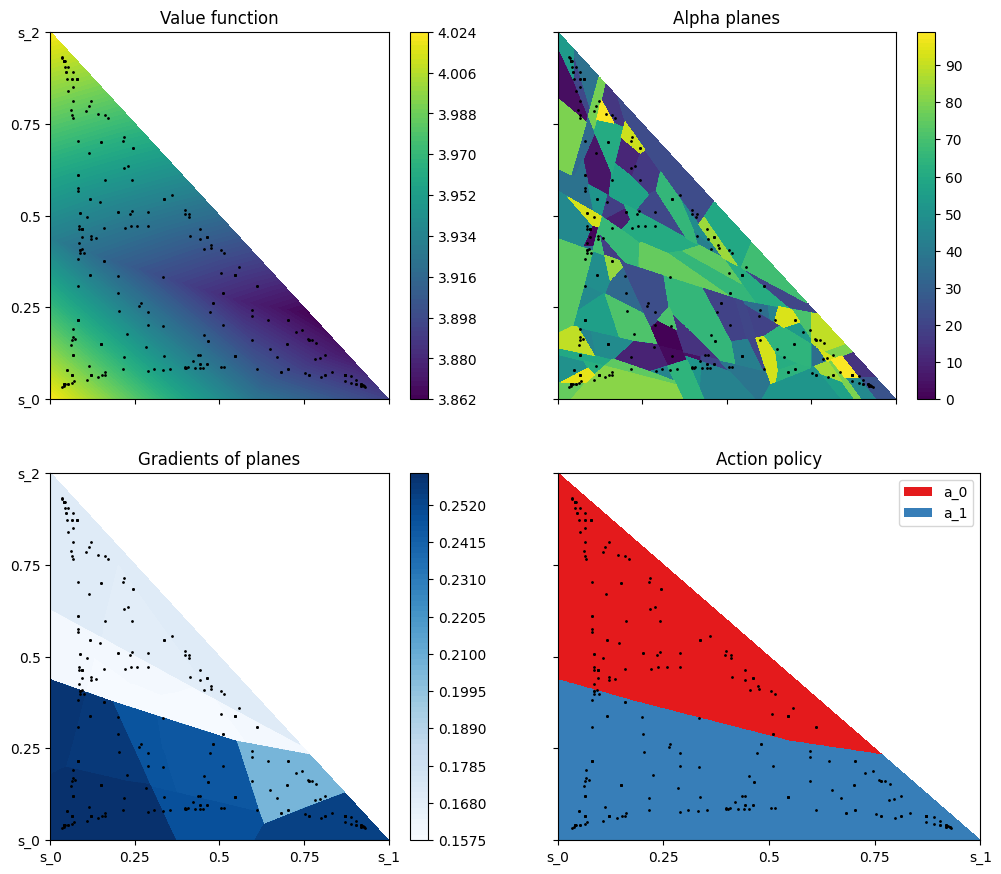

In [15]:
value_function.plot(3, belief_set=solve_history.explored_beliefs)